# K-Nearest Neighbors:

This Jupyter Notebook is dedicated to understanding and implementing the k-nearest neighbors for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Pandas](https://pandas.pydata.org/docs/)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

## Description of the Algorithm:

***
The k-nearest neighbors (KNN) algorithm is a simple yet powerful machine learning technique used for classification and regression.

It works by finding the k data points in the training dataset that are closest to a given input data point based on a chosen distance metric, normally Euclidean distance.

For classification, the algorithm assigns the majority class among the k nearest neighbors to the input data point to make its predictions.

Here is a classification example:

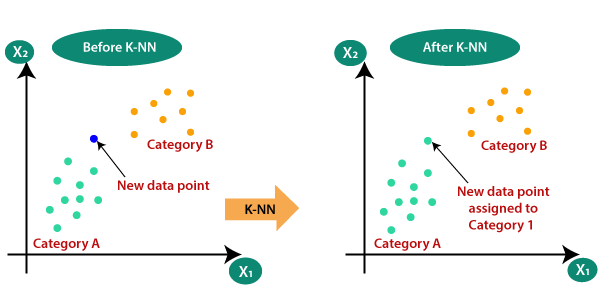

For regression, it calculates the average or weighted average of the target values of those neighbors.

KNN is intuitive, non-parametric, and requires no training phase, making it easy to implement, but its performance can degrade with large datasets due to its computational complexity.

This is the first non-parametric algorithm we are looking at!

Image source: [Medium](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4).
***

## Parametric vs. Non-Parametric in Machine Learning:

***
Parametric and non-parametric methods are two fundamental approaches in machine learning for modeling the relationship between input features and target variables:

**Parametric Methods:**
- Assumption of Fixed Model Structure: Parametric methods make strong assumptions about the functional form or distribution of the underlying data. They assume that the model's parameters (coefficients) are fixed regardless of the size of the training data.
- Fewer Training Data Requirements: Parametric models typically require fewer training samples to estimate model parameters, making them computationally efficient and well-suited for large datasets.
- Simplified Inference: Parametric models offer simplified inference, as the model structure is predefined, allowing for straightforward interpretation of model parameters and predictions.
- Examples: Linear regression and logistic regression are common examples of parametric methods (many of which we have already seen!).


**Non-parametric Methods:**
- Flexibility in Model Complexity: Non-parametric methods do not make explicit assumptions about the functional form of the data distribution. Instead, they rely on the data itself to determine the model's complexity, allowing for greater flexibility and adaptability to complex patterns.
- More Training Data Requirements: Non-parametric models typically require more training data to accurately capture the underlying data distribution. They can potentially memorize the training data, which may lead to overfitting, especially with small datasets.
- Complex Inference: Non-parametric models often result in more complex inference, as they may involve estimating the model's structure directly from the data. This can make interpretation and understanding of the model more challenging.
- Examples: Decision trees, k-nearest neighbors (KNN), support vector machines (SVM), and neural networks are examples of non-parametric methods.

***

## The Algorithm:

The KNN Algorithm
- Load the data
- Initialize K to your chosen number of neighbors
- For each example in the data
    - 3.1 Calculate the distance between the query example and the current example from the data.
    - 3.2 Add the distance and the index of the example to an ordered collection
- Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
- Pick the first K entries from the sorted collection
- Get the labels of the selected K entries
- If regression, return the mean of the K labels
- If classification, return the mode of the K labels
- Before implementing this algorithm we creat a training set and testing set by running the following code.


***
Import the necessary modules and import the data.
***

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import seaborn as sns

soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

***
Define a function to determine the distance. We can use: $d(p,q) = \sqrt{(p-q)^T (p-q)}$
***

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

***
Implement the k-nearest neighbors algorithm.
***

In [4]:
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []

    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)

    neighbors.sort(key = lambda x : x[-1])

    return neighbors[:k]

***
Now we can predict the target. We can make predictions for regression and classification. We can make a function that accounts for both.
***

In [5]:
def KNN_Predict(point, training_features, training_labels, k, regression = False):

    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)

    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)

    else:
        return sum(x[1] for x in neighbors)/k

***
Implement k-nearest neighbors for a regression algorithm.
***

In [6]:
# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 250 data points.
data = soccer[:250]

# Selects carries into the penalty area as our predictor.
predictors = data[['CPA']]

# Now do the same for the clearances.
y = data[['Clr']]

# Convert each to a numpy array.
y = y.values
x = predictors.values

# Get the testing data.
testing = soccer[250:]
t_predictors = data[['CPA']]
t_y = data[['Clr']]
t_y = t_y.values
t_x = t_predictors.values

***
Let's plot it to see the shape of the data.
***

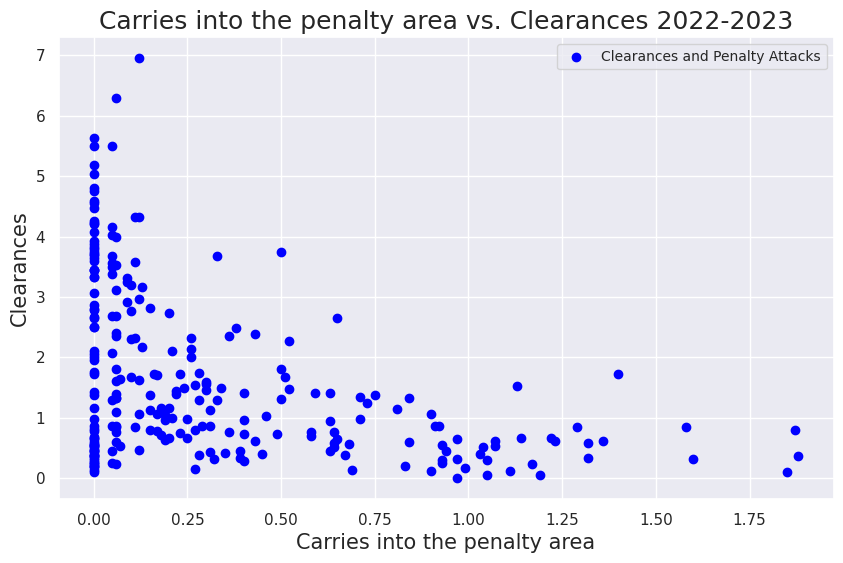

In [7]:
# Set the theme.
sns.set_theme()

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", label = "Clearances and Penalty Attacks")
plt.xlabel("Carries into the penalty area", fontsize = 15)
plt.ylabel("Clearances", fontsize = 15)
plt.title("Carries into the penalty area vs. Clearances 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

***
Test the k-nearest neighbors for this function.
***

In [8]:
k_nearest_neighbors(t_x[171], x, y, 5)

[[array([0.25]), array([0.66]), 0.0],
 [array([0.25]), array([0.98]), 0.0],
 [array([0.26]), array([2.14]), 0.010000000000000009],
 [array([0.24]), array([1.5]), 0.010000000000000009],
 [array([0.26]), array([2.32]), 0.010000000000000009]]

***
Test the prediction function.
***

In [10]:
# Test our function
print(f"The x-value is {t_x[86][0]}")
print(f"The predicted y-value is {KNN_Predict(t_x[86], x, y, 5, True)[0]}")
print(f"The true y-value is {y[86][0]}")

The x-value is 0.27
The predicted y-value is 1.3920000000000001
The true y-value is 0.8


This makes sense looking at the graph above. A y value of 1.39 makes perfect sense for an x value of 0.27.

***
Compute the total function mse.
***

In [11]:
# Create a function that returns the mean-squared error.
def mse(actual, predicted):
     # Calculate squared differences between actual and predicted values.
    squared_errors = [(actual[i] - predicted[i]) ** 2 for i in range(len(actual))]

    # Calculate the mean of squared errors.
    return sum(squared_errors) / len(actual)

# Get the predictions.
y_hat = [KNN_Predict(t_x[i], x, y, 5, True) for i in range(len(x))]

# Compute the mse.
err = mse(y, y_hat)

print(f"We get a mse of {round(err[0],2)}")

We get a mse of 1.64


***
Plot the function with the fitted line.
***

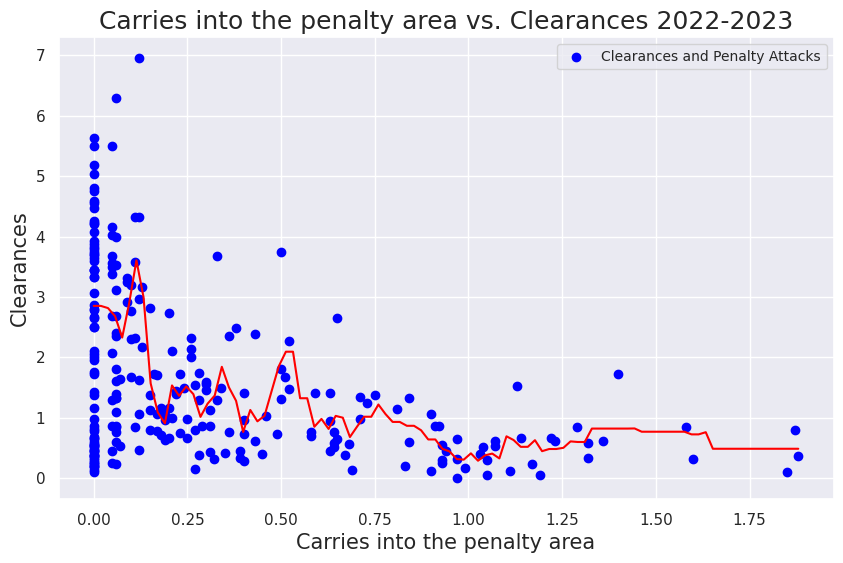

In [12]:
# Set the domain.
domain = np.linspace(np.min(x), np.max(x), 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", label = "Clearances and Penalty Attacks")

# Plot the model.
plt.plot(domain, [KNN_Predict(domain[i], x, y, 5, True) for i in range(len(domain))], color = 'red')

# Add labels and the legend.
plt.xlabel("Carries into the penalty area", fontsize = 15)
plt.ylabel("Clearances", fontsize = 15)
plt.title("Carries into the penalty area vs. Clearances 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()


***
Let's compare this to how linear regression would perform.
***

In [13]:
# Create a class that implements linear regression.
class SingleNeuron(object):
    # Initialize the class object.
    def __init__(self, activation_function):
            self.activation_function = activation_function

    # Train the model.
    def train(self, x, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + x.shape[1])
        self.errors_ = []
        N = x.shape[0]

        # Loop through the epochs.
        for _ in range(epochs):
            errors = 0
            # Keep track of the errors for each epoch.
            for xi, target in zip(x, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    # Predict the output.
    def predict(self, x):
        preactivation = np.dot(x, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


# Define the activation function.
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(x, y, alpha = 0.0001, epochs = 50)

<ipython-input-13-5811c8bda8cf>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w_[-1] -= alpha*error


***
Let's plot our results.
***

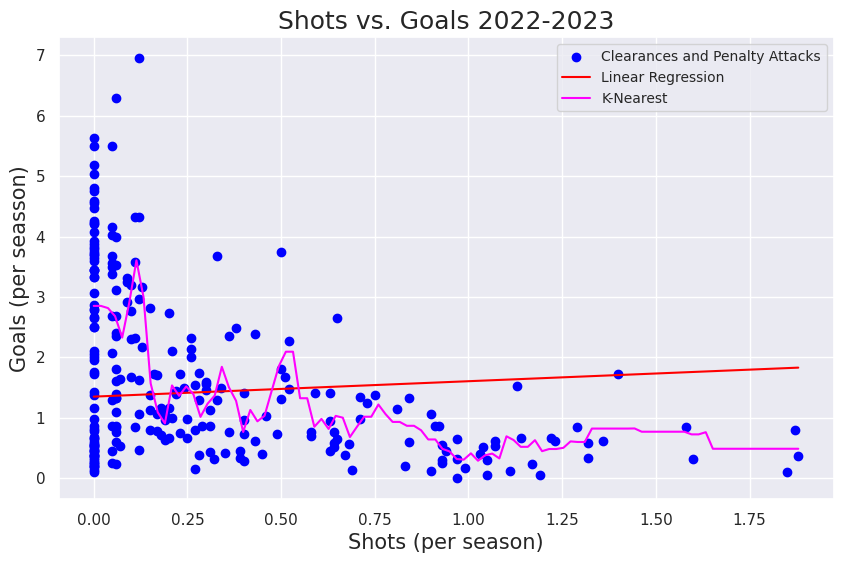

In [14]:
# Set the domain.
domain = np.linspace(np.min(x), np.max(x), 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = "blue", label = "Clearances and Penalty Attacks")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red', label = "Linear Regression")
plt.plot(domain, [KNN_Predict(domain[i], x, y, 5, True) for i in range(len(domain))], color = 'magenta', label = "K-Nearest")

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

***
We can also get the mse of the testing data.
***

In [15]:
y_hat = node.predict(t_x.reshape(-1, 1))

# Compute the mse.
err = mse(y, y_hat)

print(f"We get a mse of {round(err[0],2)}")

We get a mse of 2.2


This is much worse than the k-nearest version, so we know we are doing something right!

## Let's now use K-Nearest for Classification:

***
Read in the data.
***

In [16]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 350 data points.
data = soccer[:350]
data = data[data['ToTkl%'] > 0.0001]

# Filter the data to only include players who have received a red card.
h_success = data[data['ToSuc%'] > 50]
l_success = data[data['ToSuc%'] <= 50]

# Select fouls as a predictor.
h_sca = h_success[['SCA']].values
l_sca = l_success[['SCA']].values

# Select yellow cards as a predictor.
h_tkl = h_success[['ToTkl%']].values
l_tkl = l_success[['ToTkl%']].values

# Get the training data.
train_p = data[['SCA', 'ToTkl%']].values
train_r = np.where(data['ToSuc%'] > 50, 0, 1)

# Get the testing data.
testing = soccer[350:]
test_p = testing[['SCA', 'ToTkl%']].values
test_r = np.where(testing['ToSuc%'] > 50, 0, 1)


***
Plot the data.
***

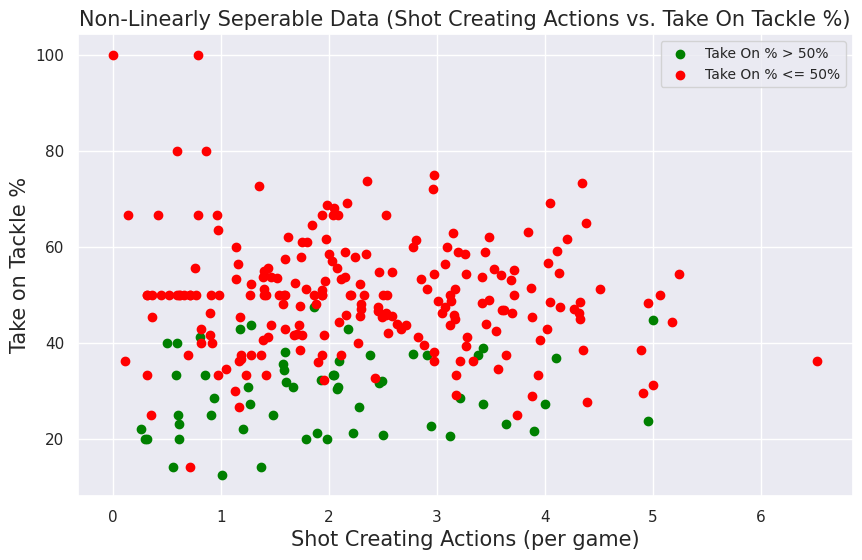

In [17]:
# Set the theme.
sns.set_theme()

plt.figure(figsize = (10, 6))

# Add the red card players to the plot.
plt.scatter(h_sca, h_tkl, color = "green", label = "Take On % > 50%")

# Add the non red card players to the plot.
plt.scatter(l_sca, l_tkl, color = "red", label = "Take On % <= 50%")
plt.xlabel("Shot Creating Actions (per game)", fontsize = 15)
plt.ylabel("Take on Tackle %", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Non-Linearly Seperable Data (Shot Creating Actions vs. Take On Tackle %)", fontsize = 15)
plt.show()

***
Implement the algorithm.
***

In [18]:
# Test our function
print(f"The x-value is {test_p[86]}")
print(f"The predicted y-value is {KNN_Predict(test_p[86], train_p, train_r, 5)}")
print(f"The true y-value is {test_r[86]}")

The x-value is [ 1.96 57.1 ]
The predicted y-value is 1
The true y-value is 1


***
Get the error percent.
***

In [19]:
# Create a function that returns the mean-squared error.
def mse(actual, predicted):
     # Calculate squared differences between actual and predicted values.
    squared_errors = [(actual[i] - predicted[i]) ** 2 for i in range(len(actual))]

    # Calculate the mean of squared errors.
    return sum(squared_errors) / len(actual)

# Get the predictions.
y_hat = [KNN_Predict(t_x[i], x, y, 5, True) for i in range(len(x))]

# Compute the error percent.
err = mse(y, y_hat)

def error(test_p, test_r, train_p, train_r, k):
  err = 0
  for point, label in zip(test_p, test_r):
      err += label != KNN_Predict(point, train_p, train_r, k)
  return err/len(test_p)

err = error(test_p, test_r, train_p, train_r, 5)

print(f"We got an error percent of {round(err,2)}")

We got an error percent of 0.27


This seems pretty good, especially given the overlap in that data.

## Selecting the best k-value:

General rules:
 - As k decreases, our predictions become less stable. We are only relying on one point and can easily be led astray by an outlier.

- As k increases, our predictions become more stable because we are making our predictions based on more points. Still, making k too large will make our model resistent to change causing it to change its predictions too slowly or miss subtleties in the data.

Selecting the optimal k:
- There's no mathematically backed way of choosing the "right" k value.
- Instead, we can just choose some initial k value keeping in mind the above.
- Then, plot between error rate and k for a range of k values. Choose the k value having the minimum error rate.

Advantages of k-nearest neighbors:
- There is a simple algorithm that's easy to implement.
- There’s no need to build a model, tune several parameters, or make additional assumptions. It works for all types of data.
- The algorithm can be used for classification, regression.

Disadvantages of k-nearest neighbors:
- The algorithm gets significantly slower as the number of examples and/or predictors increase.
- We have to do some post-processing to select the best k.

***
Let's now implement the algorithm for selecting the best k.
***

In [20]:
# Get the errors for our range of possible k values.
possible_k = [k for k in range(1, 51, 2)]
errors = [error(test_p, test_r, train_p, train_r, k) for k in possible_k]

***
Plot the possible k-values vs. their errors.
***

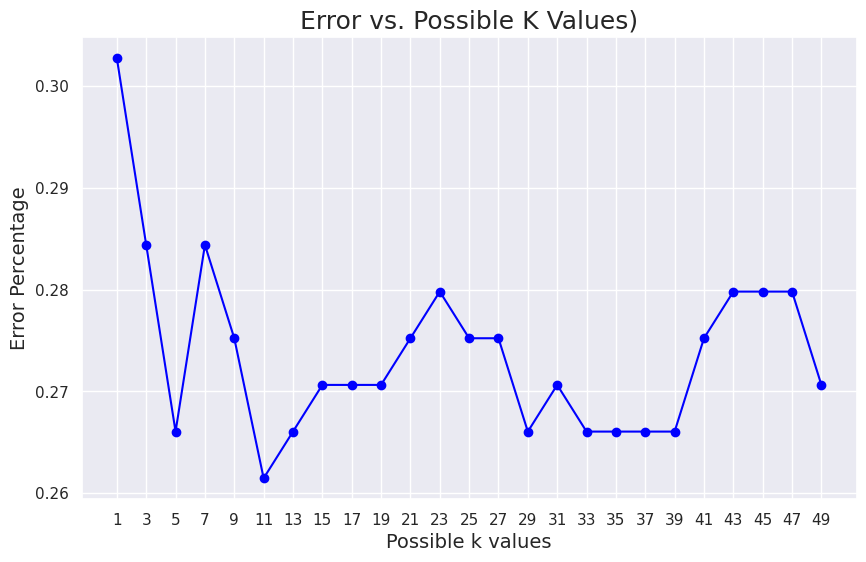

In [21]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Plot the data.
plt.plot(possible_k, errors, color = 'blue', marker = "o")
plt.xlabel('Possible k values', fontsize = 14)
plt.ylabel('Error Percentage', fontsize = 14)
plt.xticks(possible_k)
plt.title("Error vs. Possible K Values)", fontsize = 18)
plt.show()

k = 11 gets the lowest error, so I would choose that.

## Conlusion:

***
1. Simple and Intuitive: KNN is a simple and intuitive algorithm for classification and regression tasks. It operates on the principle of similarity, where instances are classified based on the majority vote of their nearest neighbors or their average value.

2. Non-parametric and Lazy Learning: KNN is a non-parametric and lazy learning algorithm, meaning it does not make strong assumptions about the underlying data distribution and does not explicitly learn a model from the training data. Instead, it stores the entire training dataset and performs computations at prediction time.

3. Flexible and Adaptive: KNN can adapt to complex decision boundaries and nonlinear relationships in the data. It is suitable for both linear and nonlinear classification and regression tasks and can handle multiclass problems with ease.

4. Sensitive to Distance Metric and K Value: The performance of KNN is highly dependent on the choice of distance metric and the value of k (the number of nearest neighbors). Selecting appropriate values for these parameters is crucial for achieving optimal performance and avoiding overfitting or underfitting.

All in all, k-nearest neighbors worked well, but I am excited to learn about other, new non-parametric algorithms.
***